# <center><h1><b>Iris Flower Classification Project</b></h1></center>



## Import libraries

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Basic info

In [39]:
df = pd.read_csv("iris_data.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
df.shape

(150, 5)

In [42]:
df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object

In [43]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [44]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Charts for Data Understanding

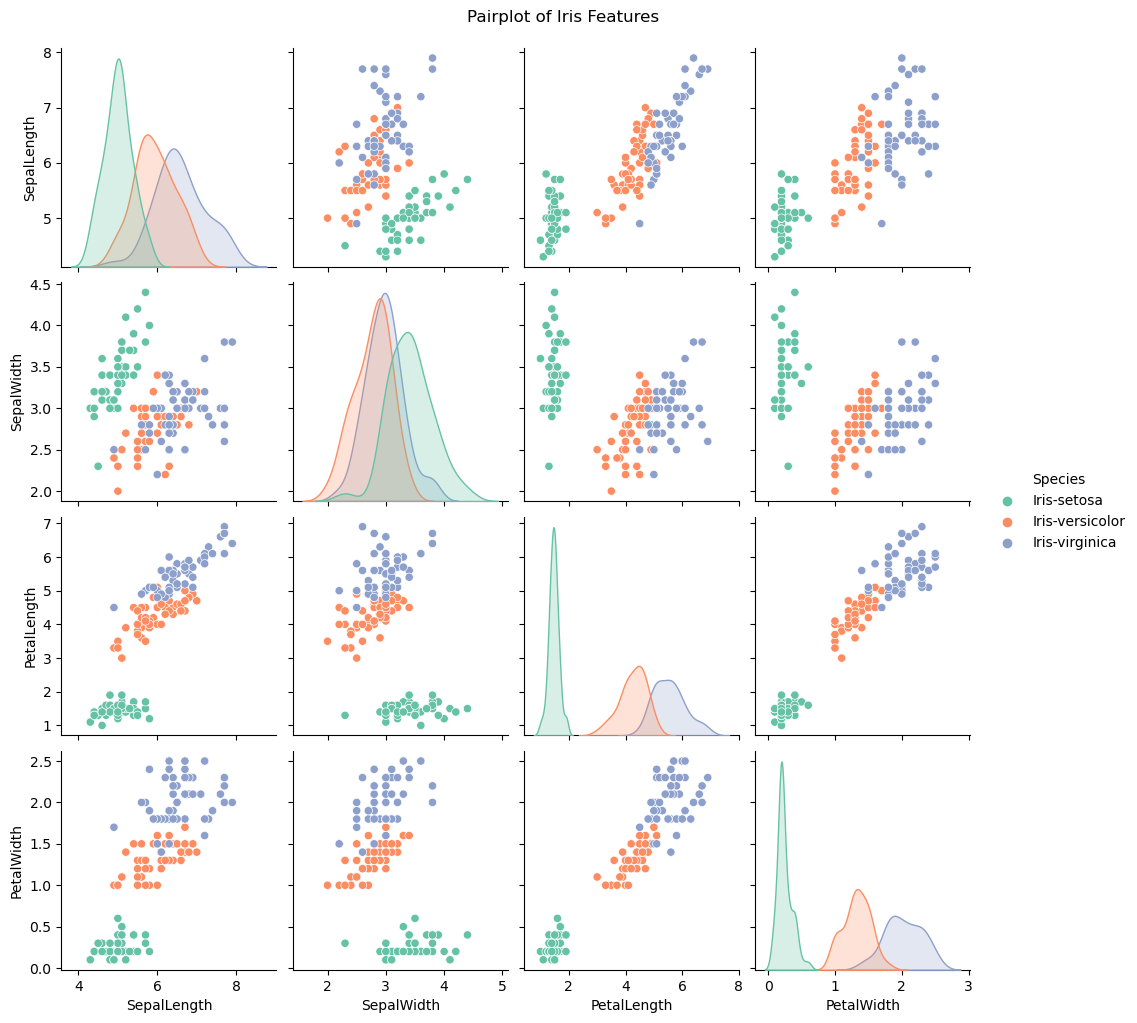

In [45]:
# Pairplot - visualize feature relationships

sns.pairplot(df, hue='Species', palette='Set2')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

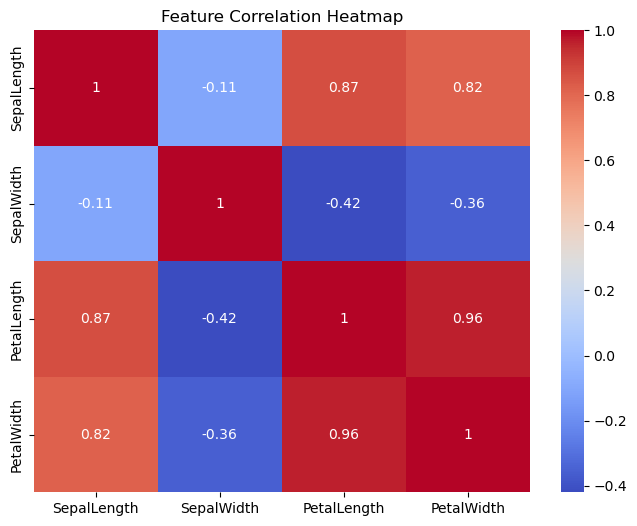

In [46]:
# Correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Preprocessing

In [47]:
#Feature Scaling (standardization)
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, :-1]  
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##  Model Training

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

## Evaluation

In [49]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Confusion Matrix

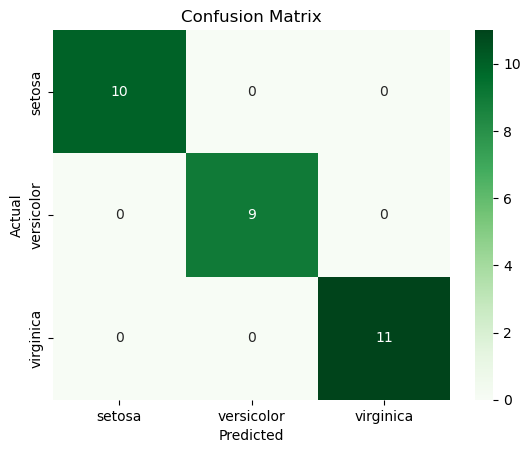

In [50]:
cm = confusion_matrix(y_test, y_pred)
labels = ['setosa', 'versicolor', 'virginica']  # or get them from df['species'].unique()

sns.heatmap(cm, annot=True, cmap="Greens",
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## This project uses sepal and petal measurements to classify Iris flowers into Setosa, Versicolor, and Virginica using Logistic Regression